In [3]:
import csv
import json
from datetime import datetime
import pandas as pd

In [3]:
def is_int(string):
    try:
        int(string)
        return True
    except ValueError:
        return False

def is_float(string):
    try:
        float(string)
        return True
    except ValueError:
        return False

def is_dd_mm_yy_format(string):
    format = "%d/%m/%y"
    try:
        bool(datetime.strptime(string, format))
        return True
    except ValueError:
        return False
    
data = []
with open('../data_world/Dataset_Border_Forensic.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        # print(is_float(row['latitude']), is_float(row['longitude']), row['latitude'], row['longitude'])
        if is_float(row['longitude']) and is_float(row['latitude']) and is_dd_mm_yy_format(row['Found dead on ']) and is_int(row['Number of deaths']):
            data.append(dict(long = float(row['longitude']), lat = float(row['latitude']), name = str(row['name, gender, age']), date_sorted = str(row['DATE to SORT FILE']), date_found = str(row['Found dead on ']), num_death = str(row['Number of deaths']), cause_death = str(row['cause of death'])))

In [4]:
data_unhcr = []
with open('../data_world/Dataset_UNHCR.csv', newline='') as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        data_unhcr.append(dict(country = str(row['Country of asylum (ISO)']), refugees = int(row["Refugees under UNHCR's mandate"]), asylum_seekers = int(row['Asylum-seekers'])))

In [5]:
print(data_unhcr)

[{'country': 'USA', 'refugees': 363059, 'asylum_seekers': 1798792}, {'country': 'AFG', 'refugees': 52159, 'asylum_seekers': 218}, {'country': 'ALB', 'refugees': 2676, 'asylum_seekers': 5}, {'country': 'EGY', 'refugees': 294632, 'asylum_seekers': 63881}, {'country': 'ARG', 'refugees': 4094, 'asylum_seekers': 11100}, {'country': 'ARM', 'refugees': 34634, 'asylum_seekers': 580}, {'country': 'AUS', 'refugees': 54430, 'asylum_seekers': 90549}, {'country': 'AUT', 'refugees': 258613, 'asylum_seekers': 53087}, {'country': 'AZE', 'refugees': 6414, 'asylum_seekers': 152}, {'country': 'BEL', 'refugees': 150713, 'asylum_seekers': 41810}, {'country': 'BGD', 'refugees': 952384, 'asylum_seekers': 24}, {'country': 'BLR', 'refugees': 19715, 'asylum_seekers': 639}, {'country': 'BRA', 'refugees': 67522, 'asylum_seekers': 206764}, {'country': 'BIH', 'refugees': 274, 'asylum_seekers': 66}, {'country': 'BGR', 'refugees': 176297, 'asylum_seekers': 11165}, {'country': 'CAN', 'refugees': 140621, 'asylum_seeker

In [6]:
hist_data = []
for i in range(len(data_unhcr)):
    # print(list(data_unhcr[i].values()))
    hist_data.append(list(data_unhcr[i].values())[1] + list(data_unhcr[i].values())[2])

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import math

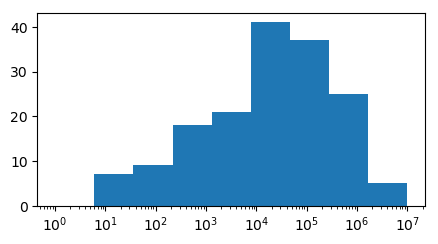

In [8]:
plt.figure(figsize=(5,2.5))
plt.hist(hist_data, bins=10**np.linspace(0, 7, 10))
plt.xscale('log')
plt.show()

(array([97., 29., 17., 10.,  5.,  3.,  2.,  2.,  0.,  2.]),
 array([   0.        ,  195.97436057,  391.94872114,  587.9230817 ,
         783.89744227,  979.87180284, 1175.84616341, 1371.82052398,
        1567.79488454, 1763.76924511, 1959.74360568]),
 <a list of 10 Patch objects>)

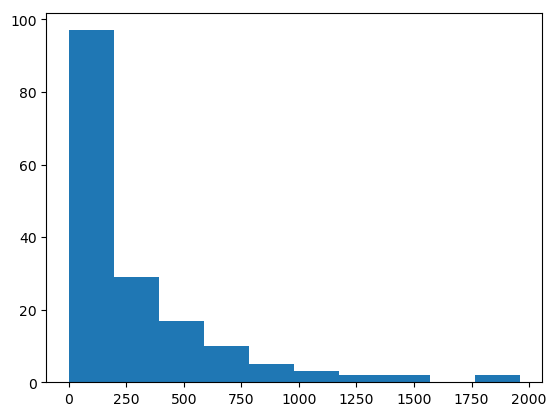

In [9]:
plt.hist([math.sqrt(x) for x in hist_data])


In [10]:
print(data)

[{'long': 25.394926, 'lat': 37.267058, 'name': 'Lina Al-Muhammad Bint Ali (w,32)', 'date_sorted': '30/5/2023', 'date_found': '30/05/23', 'num_death': '1', 'cause_death': 'drowned, boat capsized off Mykonos (GR) on way to Italy; body found 30m deep inside sunken boat; 2 r'}, {'long': 25.394926, 'lat': 37.267058, 'name': 'Abeer Muhammad Othman (w,39)', 'date_sorted': '30/5/2023', 'date_found': '30/05/23', 'num_death': '1', 'cause_death': 'drowned, boat capsized off Mykonos (GR) on way to Italy; body found 30m deep inside sunken boat; 2 r'}, {'long': 25.394926, 'lat': 37.267058, 'name': 'Zainab Fares (girl, 16)', 'date_sorted': '30/5/2023', 'date_found': '30/05/23', 'num_death': '1', 'cause_death': 'drowned, boat capsized off Mykonos (GR) on way to Italy; body found 30m deep inside sunken boat; 2 r'}, {'long': 25.394926, 'lat': 37.267058, 'name': 'Juliana Nadim Najjar (girl, 15)', 'date_sorted': '30/5/2023', 'date_found': '30/05/23', 'num_death': '1', 'cause_death': 'drowned, boat capsize

In [11]:
data_json = json.dumps(data)
with open("..//data_world//united_data.json", "w") as outfile:
    outfile.write(data_json)
# print data_json

In [12]:
# ("\\u00c3\\u00a4".encode('latin-1').decode('unicode_escape').encode('latin-1').decode('utf-8'))
"\\ud83c\\uddeb\\ud83c\\uddf7".encode('ascii').decode('unicode-escape').encode('utf-16', 'surrogatepass').decode('utf-16')

'🇫🇷'

In [27]:
# Data from "undesa_pd_2020_ims_stock_by_sex_and_destination"
# Read excel file
xls = pd.ExcelFile(
    '../data_world/undesa_pd_2020_ims_stock_by_sex_and_destination.xlsx')
# Names, M49 location codes and how the data was estimated 
dfNamesCodesTypes = pd.read_excel(xls, 'Table 1', header=10, usecols="B, D, E")
# Formatting 
dfNamesCodesTypes["Region, development group, country or area"] = dfNamesCodesTypes["Region, development group, country or area"].str.strip().str.rstrip('*')
dfNamesCodesTypes["Type of data"].fillna('NaN', inplace=True)
# df1 --> "Table 1" --> "International migrant stock at mid-year, both sexes combined"
# df2 --> "Table 2" --> "Total population at mid-year, both sexes combined (thousands)"
# df3 --> "Table 3" --> "International migrant stock as a percentage of the total population, both sexes combined"
# df4 --> "Table 5" --> "Annual rate of change of the migrant stock, both sexes combined"
# df5 --> "Table 6" --> "Refugee and asylum seekers at mid-year, both sexes combined"
# df6 --> "Table 6" --> "Refugee and asylum seekers as a percentage of the international migrant stock"
# df7 --> "Table 6" --> "Annual rate of change of the refugee and asylum seekers, both sexes combined"
df1 = pd.read_excel(xls, 'Table 1', header=10, usecols="F:L")
df2 = pd.read_excel(xls, 'Table 2', header=10, usecols="F:L")
df3 = pd.read_excel(xls, 'Table 3', header=10, usecols="F:L")
df4 = pd.read_excel(xls, 'Table 5', header=10, usecols="F:K")
df5 = pd.read_excel(xls, 'Table 6', header=10, usecols="F:L")
df6 = pd.read_excel(xls, 'Table 6', header=10, usecols="M:S")
df7 = pd.read_excel(xls, 'Table 6', header=10, usecols="T:Y")

data_dtfs = [df1, df2, df3, df4, df5, df6, df7]
descriptions = ["International migrant stock at mid-year, both sexes combined",
                "Total population at mid-year, both sexes combined (thousands)",
                "International migrant stock as a percentage of the total population, both sexes combined",
                "Annual rate of change of the migrant stock, both sexes combined",
                "Refugee and asylum seekers at mid-year, both sexes combined",
                "Refugee and asylum seekers as a percentage of the international migrant stock",
                "Annual rate of change of the refugee and asylum seekers, both sexes combined"]

# Data structure:
# The location codes and orders are the same for all tables
# Since the M49 codes ("code") and names of the country/region/... names ("names") are always
# the same order for each table they only appear once in the beginning
# Below the envisionned structure of the json
# {"name": [...], "code": [...], "type": [...], "data": [{"description": "...", "data": {"1995": [...], ...}}, ...]}
data_undesa = {
    "name": dfNamesCodesTypes["Region, development group, country or area"].tolist(),
    "code": dfNamesCodesTypes["Location code"].tolist(),
    "type": dfNamesCodesTypes["Type of data"].tolist(),
    "data": [{"description": descriptions[i], "data": data_dtfs[i].to_dict(orient='list')} for i in range(len(data_dtfs))]
}

# print(dfNamesCodesTypes)
# print(list(df1))
# print(df7.to_dict(orient='list'))
# print([{"description": descriptions[i], "data": data_dtfs[i].to_dict(orient='list')} for i in range(len(data_dtfs))])

print(data_undesa)

{'name': ['WORLD', 'Sub-Saharan Africa', 'Northern Africa and Western Asia', 'Central and Southern Asia', 'Eastern and South-Eastern Asia', 'Latin America and the Caribbean', 'Oceania (excluding Australia and New Zealand)', 'Australia and New Zealand', 'Europe and Northern America', 'Developed regions', 'Less developed regions', 'Less developed regions, excluding least developed countries', 'Less developed regions, excluding China', 'Least developed countries', 'Land-locked Developing Countries (LLDC)', 'Small island developing States (SIDS)', 'High-income countries', 'Middle-income countries', 'Upper-middle-income countries', 'Lower-middle-income countries', 'Low-income countries', 'AFRICA', 'Eastern Africa', 'Burundi', 'Comoros', 'Djibouti', 'Eritrea', 'Ethiopia', 'Kenya', 'Madagascar', 'Malawi', 'Mauritius', 'Mayotte', 'Mozambique', 'Réunion', 'Rwanda', 'Seychelles', 'Somalia', 'South Sudan', 'Uganda', 'United Republic of Tanzania', 'Zambia', 'Zimbabwe', 'Middle Africa', 'Angola', '